In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime2024/Crimes.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [7]:
chicago_data = pd.read_csv("/kaggle/input/crime2024/Crimes.csv")

In [9]:
print(chicago_data.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


In [11]:
chicago_data.sample(6)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
200781,13235661,JG454037,10-06-2023 22:20,011XX N MILWAUKEE AVE,031A,ROBBERY,ARMED - HANDGUN,TAVERN / LIQUOR STORE,False,False,...,-87.665078,"(41.902460352, -87.665077624)",41.0,22620.0,25.0,484.0,46.0,49.0,15.0,60.0
218098,13260930,JG484791,10/30/2023 03:35:00 PM,023XX W CERMAK RD,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.684252,"(41.852045995, -87.684252376)",8.0,14920.0,33.0,4.0,26.0,43.0,15.0,121.0
209734,13248795,JG469840,10/19/2023 10:40:00 AM,093XX S ASHLAND AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,-87.662732,"(41.72363784, -87.662732163)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,245.0
150629,13163405,JG366790,08-02-2023 03:00,100XX W OHARE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,...,-87.905227,"(41.976290414, -87.905227221)",34.0,16197.0,75.0,668.0,29.0,38.0,12.0,24.0
192141,13228451,JG438832,09/25/2023 04:58:00 PM,009XX N AVERS AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,-87.722504,"(41.898205536, -87.72250362)",41.0,4299.0,24.0,456.0,45.0,5.0,16.0,66.0
236959,13289115,JG518319,11/26/2023 04:40:00 AM,001XX N WESTERN AVE,031A,ROBBERY,ARMED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,-87.686516,"(41.884163773, -87.686516386)",48.0,21184.0,29.0,37.0,46.0,28.0,15.0,77.0


**I. DATA CLEANING**

**(i)Finding missing values**

In [12]:
print(chicago_data.info())
# Find missing values
missing_values = chicago_data.isnull()

# Count missing values in each column
missing_values_count = missing_values.sum()

# Calculate percentage of missing values in each column
missing_values_percentage = (missing_values_count / chicago_data.shape[0]) * 100

# Print the results
print("Missing values count:")
print(missing_values_count)

print("\nMissing values percentage:")
print(missing_values_percentage)

chicago_data.dropna(inplace=True)

print("\nDataset after removing the missing values")
print(chicago_data)
print(chicago_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262217 entries, 0 to 262216
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          262217 non-null  int64  
 1   Case Number                 262217 non-null  object 
 2   Date                        262217 non-null  object 
 3   Block                       262217 non-null  object 
 4   IUCR                        262217 non-null  object 
 5   Primary Type                262217 non-null  object 
 6   Description                 262217 non-null  object 
 7   Location Description        260895 non-null  object 
 8   Arrest                      262217 non-null  bool   
 9   Domestic                    262217 non-null  bool   
 10  Beat                        262217 non-null  int64  
 11  District                    262217 non-null  int64  
 12  Ward                        262214 non-null  float64
 13  Community Area

**(ii)Descriptive statistics**

In [13]:
chicago_data.describe(include='all')
chicago_data.describe(percentiles=[0.1, 0.2, 0.3])



,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,2.592420e+05,259242.000000,259242.000000,259242.000000,259242.000000,2.592420e+05,2.592420e+05,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000,259242.000000
mean,1.310514e+07,1151.895630,11.289359,23.059200,36.281906,1.165454e+06,1.887207e+06,2023.003236,41.846074,-87.668328,27.660395,18920.340689,38.024950,376.788302,26.029336,31.952103,14.808006,146.410871
std,6.526699e+05,711.498131,7.110114,13.982401,21.505698,1.617342e+04,3.163102e+04,0.056797,0.086984,0.058877,15.241160,5826.800586,19.951546,232.107922,14.417233,19.139086,6.493445,78.815211
min,2.727900e+04,111.000000,1.000000,1.000000,1.000000,1.094886e+06,1.813897e+06,2023.000000,41.644590,-87.926341,1.000000,2733.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10%,1.297912e+07,234.000000,2.000000,5.000000,7.000000,1.143591e+06,1.846271e+06,2023.000000,41.733367,-87.748065,7.000000,4451.000000,10.000000,66.000000,6.000000,6.000000,5.000000,35.000000
20%,1.301935e+07,431.000000,4.000000,8.000000,17.000000,1.151190e+06,1.855591e+06,2023.000000,41.758952,-87.720326,11.000000,14924.000000,22.000000,131.000000,10.000000,12.000000,9.000000,69.000000
30%,1.305880e+07,631.000000,6.000000,13.000000,24.000000,1.156676e+06,1.863759e+06,2023.000000,41.781571,-87.700354,17.000000,21190.000000,26.000000,204.000000,14.000000,19.000000,12.000000,92.000000
50%,1.313719e+07,1031.000000,10.000000,23.000000,32.000000,1.167153e+06,1.893244e+06,2023.000000,41.862894,-87.661861,28.000000,21559.000000,37.000000,374.000000,27.000000,30.000000,15.000000,147.000000
max,1.340743e+07,2535.000000,31.000000,50.000000,77.000000,1.205114e+06,1.951506e+06,2024.000000,42.022549,-87.524639,53.000000,26912.000000,77.000000,801.000000,50.000000,61.000000,25.000000,277.000000


***DATA VISUALIZATION***



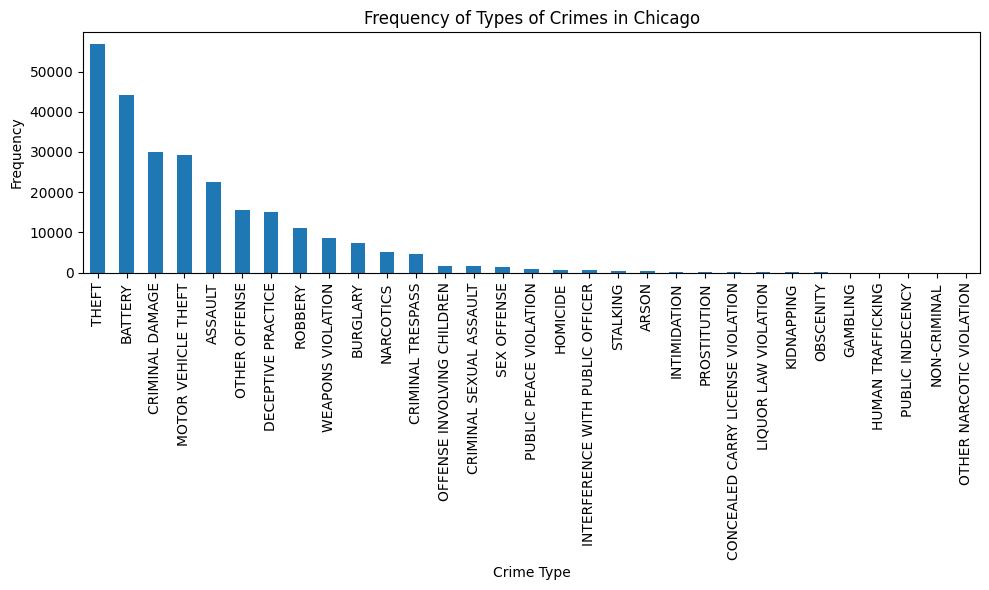

In [14]:


# Count the frequency of each crime type
crime_counts = chicago_data['Primary Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar')
plt.title('Frequency of Types of Crimes in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

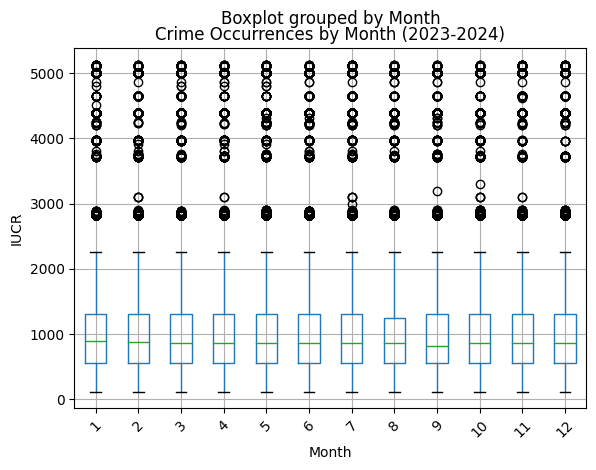

In [30]:


# Convert 'Date' column to datetime format
chicago_data['Date'] = pd.to_datetime(chicago_data['Date'])

# Convert 'IUCR' column to numeric, coerce errors
chicago_data['IUCR'] = pd.to_numeric(chicago_data['IUCR'], errors='coerce')

# Drop rows with NaN values in the 'IUCR' column
chicago_data = chicago_data.dropna(subset=['IUCR'])

# Filter data for the years 2023 to 2024
filtered_data = chicago_data[(chicago_data['Date'].dt.year >= 2023) & (chicago_data['Date'].dt.year <= 2024)]

# Extract months from the 'Date' column
filtered_data['Month'] = filtered_data['Date'].dt.month

plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='IUCR', by='Month')
plt.title('Crime Occurrences by Month (2023-2024)')
plt.xlabel('Month')
plt.ylabel('IUCR')
plt.xticks(rotation=45)
plt.show()


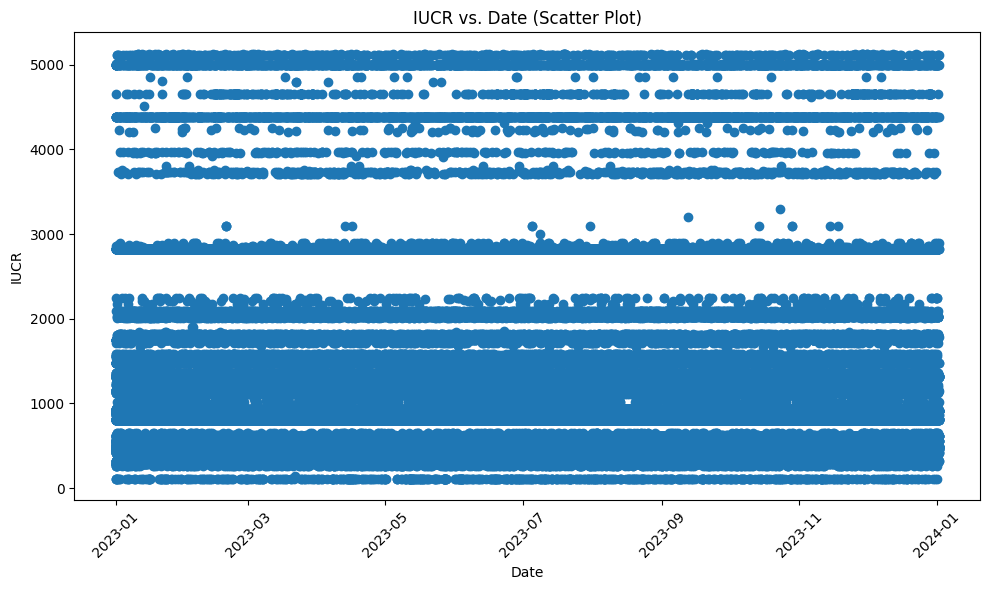

Index(['Date', 'IUCR', 'ID', 'Beat', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


In [29]:
import matplotlib.pyplot as plt


# Assuming 'Date' and 'IUCR' are your column names (adjust if different)
date_col = 'Date'
iucr_col = 'IUCR'
chicago_data['Date'] = pd.to_datetime(chicago_data['Date'], format='mixed')


# Convert 'IUCR' column to numeric, coerce errors
chicago_data['IUCR'] = pd.to_numeric(chicago_data['IUCR'], errors='coerce')

# Check data types (optional, ensure they are numerical for histogram)
if not pd.api.types.is_numeric_dtype(chicago_data[iucr_col]):
  print(f"Warning: '{iucr_col}' column might not be numerical for histogram.")

# Create the histogram (using 'date' on y-axis)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(chicago_data[date_col].dt.to_pydatetime(), chicago_data[iucr_col])  # Dates on x-axis, IUCR on y-axis
plt.xlabel('Date')
plt.ylabel('IUCR')
plt.title('IUCR vs. Date (Scatter Plot)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many categories
plt.tight_layout()
plt.show()

print(chicago_data.columns)

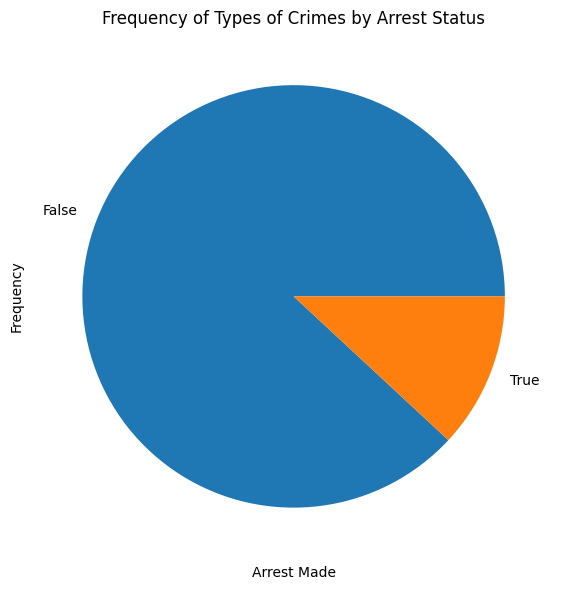

In [24]:
# Count the frequency of each crime type based on whether an arrest was made or not
arrest_counts = chicago_data.groupby('Arrest').size()

# Plotting
plt.figure(figsize=(8, 6))
arrest_counts.plot(kind='pie', color=['blue', 'salmon'])
plt.title('Frequency of Types of Crimes by Arrest Status')
plt.xlabel('Arrest Made')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

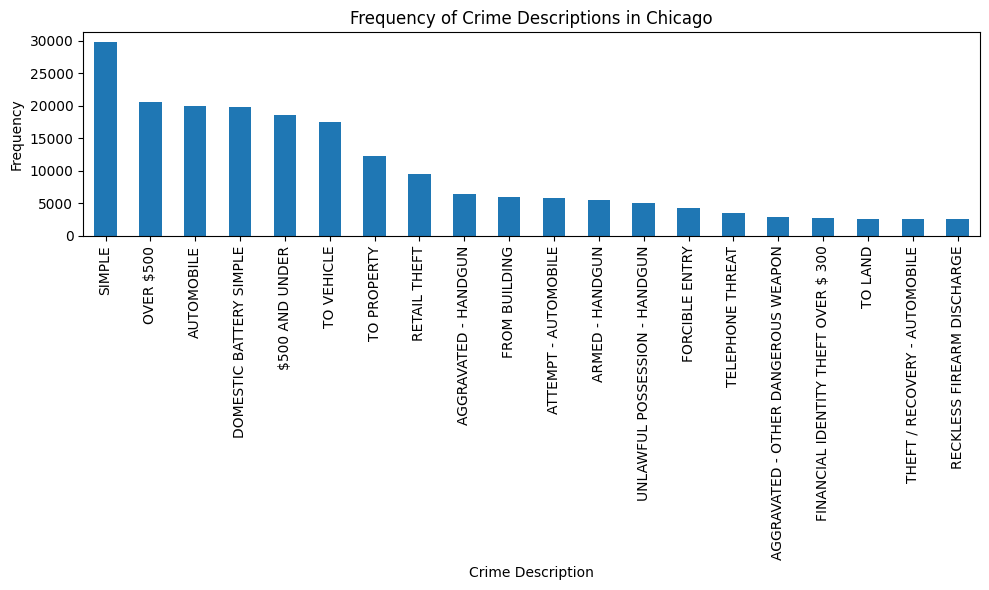

In [25]:
# Count the frequency of each crime description
description_counts = chicago_data['Description'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
description_counts.head(20).plot(kind='bar')  # Plotting only the top 20 frequent descriptions for better visualization
plt.title('Frequency of Crime Descriptions in Chicago')
plt.xlabel('Crime Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**(iii) Outlier Detection**

In [25]:
import pandas as pd
from scipy import stats

def handle_numerical_columns(data):
  """
  Analyzes and cleans numerical columns in a DataFrame, excluding the date column.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed for numerical columns (excluding date).
      int: The number of outliers removed.
      int: The number of rows removed (if any).
  """

  # Identify numerical columns (exclude date if it's a datetime type)
  numerical_cols = data.select_dtypes(include=[np.number]).columns
  if pd.api.types.is_datetime64_dtype(data['Date']):  # Check if 'date' is datetime
    numerical_cols = numerical_cols.drop('Date')  # Exclude 'date' from numerical columns

  # Analyze and clean each numerical column (excluding date)
  outliers_removed = 0
  rows_removed = 0
  for col in numerical_cols:
    # Calculate skewness and kurtosis
    skew = stats.skew(data[col])
    kurt = stats.kurtosis(data[col])
    print(f"Column: {col}\n Skewness: {skew:.4f}\n Kurtosis: {kurt:.4f}")

    # Identify and remove outliers (replace with IQR method)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    outliers_removed += len(data) - len(filtered_data)
    rows_removed = len(data) - len(filtered_data)
    data = filtered_data.copy()  # Update data with outliers removed

  return data, outliers_removed, rows_removed

# Assuming chicago_data is your DataFrame
cleaned_data, num_outliers_removed, num_rows_removed = handle_numerical_columns(chicago_data.copy())

print(f"\nOutliers removed: {num_outliers_removed}")
if num_rows_removed > 0:
  print(f"Rows removed: {num_rows_removed}")
else:
  print("No rows were removed.")

# Further analysis or use of the cleaned data can be done here


print(chicago_data.columns)

Column: ID
 Skewness: -19.3899
 Kurtosis: 385.6054
Column: Beat
 Skewness: 0.3694
 Kurtosis: -0.9679
Column: District
 Skewness: 0.3717
 Kurtosis: -0.9647
Column: Ward
 Skewness: 0.1818
 Kurtosis: -1.0959
Column: Community Area
 Skewness: 0.2343
 Kurtosis: -1.0216
Column: X Coordinate
 Skewness: -0.3544
 Kurtosis: 0.2183
Column: Y Coordinate
 Skewness: -0.0919
 Kurtosis: -0.9427
Column: Year
 Skewness: 17.5170
 Kurtosis: 304.8442
Column: Latitude
 Skewness: -0.0931
 Kurtosis: -0.9449
Column: Longitude
 Skewness: -0.1709
 Kurtosis: -0.4300
Column: Historical Wards 2003-2015
 Skewness: -0.0336
 Kurtosis: -1.2147
Column: Zip Codes
 Skewness: -1.8058
 Kurtosis: 1.7649
Column: Community Areas
 Skewness: 0.2118
 Kurtosis: -1.0661
Column: Census Tracts
 Skewness: 0.0427
 Kurtosis: -1.1115
Column: Wards
 Skewness: -0.0875
 Kurtosis: -1.2466
Column: Boundaries - ZIP Codes
 Skewness: 0.2006
 Kurtosis: -1.3843
Column: Police Districts
 Skewness: -0.3507
 Kurtosis: -0.7604
Column: Police Beats
 Sk

In [26]:
import pandas as pd
from sklearn.covariance import MinCovDet  # Alternative covariance estimator

def handle_outliers_mahalanobis(data):
  """
  Detects and removes outliers using Mahalanobis distance for numerical columns.

  Modifies the input DataFrame in-place.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.

  Returns:
      list: A list of column names that were removed due to high multicollinearity.
  """

  # Identify numerical columns
  numerical_cols = data.select_dtypes(include=[np.number])
  
  # Track removed columns due to multicollinearity
  removed_cols = []

  # Mahalanobis outlier detection for each numerical column
 
  xxx =len(chicago_data)
  for col in numerical_cols:
    try:
      # Estimate covariance matrix using MinCovDet (alternative)
      cov = MinCovDet().fit(data[[col]])
      # Mahalanobis distance calculation
      mahalanobis_dist = cov.mahalanobis(data[[col]])

      # Threshold for outlier detection (adjust based on your data and analysis)
      threshold = 3.5  # You can adjust this threshold

      # Identify and remove outliers based on Mahalanobis distance
      data = data[mahalanobis_dist < threshold]
      data = data.reset_index(drop=True)  # Reset index after filtering

      # Check for multicollinearity (optional)
      # You can choose a different multicollinearity detection method
      correlation = data.corr()
      correlation_threshold = 0.9  # Adjust threshold as needed
      collinear_pairs = []
      for i in range(len(correlation)):
        for j in range(i + 1, len(correlation)):
          if correlation.iloc[i, j] >= correlation_threshold and correlation.iloc[i, j] != 1:
            collinear_pairs.append((correlation.index[i], correlation.index[j]))
      if collinear_pairs:
        # Remove a column from each highly correlated pair (consider alternative strategies)
        for pair in collinear_pairs:
          removed_cols.append(pair[0])
          data = data.drop(pair[0], axis=1)

    except:
      # Handle potential errors (e.g., singular matrix for covariance estimation)
      removed_cols.append(col)
      print(f"Warning: Removed column {col} due to covariance estimation error.")

  return removed_cols

# Assuming chicago_crime_data is your DataFrame
removed_cols_multicollinearity = handle_outliers_mahalanobis(chicago_data)

# Print information about removed data
if removed_cols_multicollinearity:
  print(f"Removed columns due to multicollinearity: {removed_cols_multicollinearity}")
# num_rows_removed = xxx - len(chicago_data)
# if num_rows_removed > 0:
#   print(f"Rows removed due to outlier detection: {num_rows_removed}")
# else:
#   print("No rows were removed due to outlier detection.")

# chicago_crime_data is now modified with outliers and multicollinearity removed
print(chicago_data.columns)


Removed columns due to multicollinearity: ['ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats']
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


**(iv) Feature Extraction**

In [27]:
# Feature extraction incorporating 'Zip Codes' column
# You can customize this based on your dataset and requirements

# Create a new feature indicating whether the ZIP code matches with 'Boundaries-ZIP Codes'
chicago_data['zip_match'] = (chicago_data['Boundaries - ZIP Codes'] == chicago_data['Zip Codes'])

# Display the modified DataFrame with new features
print("Modified DataFrame with new features including 'zip_match':")
print(chicago_data.head())
print(chicago_data.columns)

Modified DataFrame with new features including 'zip_match':
         ID Case Number              Date                 Block  IUCR  \
0  13140855    JG341458  01-01-2023 00:00  082XX S JEFFERY BLVD  1754   
1  12938772    JG100243  01-01-2023 00:00   073XX S ABERDEEN ST  0266   
2  12976707    JG145183  01-01-2023 00:00      004XX W 110TH PL  1754   
3  13222722    JG438814  01-01-2023 00:00   052XX N SHERIDAN RD  0810   
4  13223672    JG439926  01-01-2023 00:00        003XX N MAY ST  1140   

                 Primary Type  \
0  OFFENSE INVOLVING CHILDREN   
1     CRIMINAL SEXUAL ASSAULT   
2  OFFENSE INVOLVING CHILDREN   
3                       THEFT   
4          DECEPTIVE PRACTICE   

                                         Description Location Description  \
0  AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...            APARTMENT   
1                                          PREDATORY            RESIDENCE   
2  AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...            RESIDEN

***FEATURE SUBSET SELECTION***

**Filtering**

In [28]:
# Select only numerical columns (excluding the target variable if applicable)
numerical_data = chicago_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation = numerical_data.corr()

# Set a threshold for high correlation (e.g., 0.8)
correlation_threshold = 0.8

# Identify highly correlated features (exclude 'date' and 'IUCR')
highly_correlated = set()
date_col = 'Date'
iucr_col = 'IUCR'  # Assuming 'IUCR' is the column name (adjust if different)
numerical_cols_without_date_iucr = numerical_data.columns.difference([date_col, iucr_col])
for i in range(len(correlation)):
  col1 = correlation.index[i]
  if col1 == date_col or col1 == iucr_col:  # Skip 'date' and 'IUCR' columns for comparison
    continue
  for j in range(i + 1, len(correlation)):
    col2 = correlation.index[j]
    if col2 == date_col or col2 == iucr_col:  # Skip 'date' and 'IUCR' columns for comparison
      continue
    if correlation.iloc[i, j] >= correlation_threshold and correlation.iloc[i, j] != 1:
      # Remove the feature with lower variance (assuming it provides less information)
      if numerical_data[col1].var() < numerical_data[col2].var():
        highly_correlated.add(col1)
      else:
        highly_correlated.add(col2)

# Removed columns due to high correlation:
removed_columns_filtering = list(highly_correlated)
print(f"Removed columns (filtering): {removed_columns_filtering}")
print("Reason for removal: High correlation (above threshold) with another feature, potentially redundant.")

# Filtered numerical data (excluding highly correlated features and preserving 'date' and 'IUCR')
filtered_numerical_data = numerical_data.drop(columns=removed_columns_filtering)
chicago_data = pd.concat([chicago_data[[date_col, iucr_col]], filtered_numerical_data], axis=1)
print(chicago_data.columns)


Removed columns (filtering): ['Latitude', 'District', 'Longitude']
Reason for removal: High correlation (above threshold) with another feature, potentially redundant.
Index(['Date', 'IUCR', 'ID', 'Beat', 'Ward', 'Community Area', 'X Coordinate',
       'Y Coordinate', 'Year', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')


**This code selects only numerical columns from your DataFrame.**

It calculates the correlation matrix for these columns.
A threshold is set to identify features with very high correlation (e.g., 0.8).
Highly correlated features are identified, and the one with lower variance is removed (assuming it contributes less information).
The removed columns and the reason for removal (high correlation) are printed.
Finally, a new DataFrame (filtered_data_filtering) excludes the highly correlated features.

In [31]:


# Convert 'Occurrences' column to numeric
chicago_data['IUCR'] = pd.to_numeric(chicago_data['IUCR'], errors='coerce')

quartiles = chicago_data['IUCR'].quantile([0.25, 0.5, 0.75])
print("Quartiles of Crime Occurrences:")
print(quartiles)

Quartiles of Crime Occurrences:
0.25     560.0
0.50     860.0
0.75    1310.0
Name: IUCR, dtype: float64


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load the Chicago crime data
# Assuming chicago_data is already loaded

# Extract numerical columns for modeling
numerical_data = chicago_data.select_dtypes(include=['int', 'float'])

# Define the target variable
target_variable = 'IUCR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_data, chicago_data[target_variable], test_size=0.2, random_state=42)

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imputed, y_train)

# Evaluate the model's performance on the training data
train_score = model.score(X_train_imputed, y_train)
print("Training R^2 score:", train_score)

# Define the dates to predict
dates_to_predict = ['2024-02-29']  # Assuming February has 29 days in 2024
predicted_values = []

# Iterate over each date and make predictions
for date in dates_to_predict:
    # Create a new row with missing values for the date to predict
    features_to_predict = X_train.iloc[0].copy()  # Take any row as template
    features_to_predict.name = pd.to_datetime(date)
    features_to_predict[:] = pd.NA
    
    # Impute missing values in the features
    features_to_predict_imputed = imputer.transform([features_to_predict])
    
    # Predict using the trained model
    prediction = model.predict(features_to_predict_imputed)[0]
    predicted_values.append(prediction)

# Display the predicted values
predicted_data = pd.DataFrame({'Date': dates_to_predict, 'Predicted IUCR': predicted_values})
print(predicted_data)


Training R^2 score: 0.9999998790715168
         Date  Predicted IUCR
0  2024-02-29         1051.75


In [33]:
print(chicago_data['Date'])


0        2023-01-01 00:00:00
1        2023-01-01 00:00:00
2        2023-01-01 00:00:00
3        2023-01-01 00:00:00
4        2023-01-01 00:00:00
                 ...        
262212   2024-01-01 23:37:00
262213   2024-01-01 23:40:00
262214   2024-01-01 23:45:00
262215   2024-01-01 23:45:00
262216   2024-01-01 23:50:00
Name: Date, Length: 238831, dtype: datetime64[ns]
